## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [118]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
matplotlib.style.use('fivethirtyeight')

In [119]:
df = pd.read_csv('data/human_body_temperature.csv')

## Basic Summary Statistics

In [157]:
size = float(len(df))
print 'Size: ',  size
mean = np.average(df.temperature)
print 'Mean: ', mean
sigma = np.std(df.temperature)
print 'Standard Deviation: ', sigma
error = sigma / (size**.5)
print 'Sample Error: ', error

Size:  130.0
Mean:  98.2492307692
Standard Deviation:  0.730357778907
Sample Error:  0.0640566146954


$n = 130$

$\overline {x}=98.25$

$\sigma = .73$

$SE = 0.064$


In [148]:
temps = sorted(df.temperature)

## 1. Check for normal distribution

There is moderate skew, but since the sample size is large, the normal distribution seems to be an appropriate model.

A Z-test will be used, as the sample size is larger than 30. A t-test could also be used and, with 129 degrees of freedom, the difference between the two tests would be negligible.

(array([ 0.06837607,  0.06837607,  0.06837607,  0.13675214,  0.30769231,
         0.20512821,  0.34188034,  0.54700855,  0.61538462,  0.41025641,
         0.61538462,  0.41025641,  0.37606838,  0.13675214,  0.03418803,
         0.        ,  0.06837607,  0.        ,  0.        ,  0.03418803]),
 array([  96.3  ,   96.525,   96.75 ,   96.975,   97.2  ,   97.425,
          97.65 ,   97.875,   98.1  ,   98.325,   98.55 ,   98.775,
          99.   ,   99.225,   99.45 ,   99.675,   99.9  ,  100.125,
         100.35 ,  100.575,  100.8  ]),
 <a list of 20 Patch objects>)

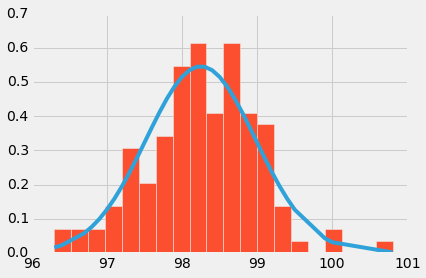

In [189]:
fit = stats.norm.pdf(temps, mean, sigma)
plt.plot(temps, fit)
plt.hist(temps, 20, normed=True)

## 2. Hypotheses
Null Hypothesis: The true population mean is 98.6.

Alternative Hypothesis: The true population mean is is different than 98.6

$H_{0}: \mu = 98.6^{\circ}$

$H_{a}: \mu \neq 98.6^{\circ}$


In [190]:
z = .35/error
p = (1 - stats.norm.cdf(z)) * 2

4.6574243128816306e-08

### Results

$\mu_{null} - \mu_{point} = 35^{\circ}$

95% confidence interval: [98.12, 98.38]

*p* = .00000004

With a p value much smaller than .05, the null hypothesis is rejected. The actual population mean is not 98.6º.

## 3. Abnormal Temperatures

Someone would be considered to have an abnormal temperature if their reading fell outside of 95% of the population. This interval is [96.8, 99.7].

## 4. Male v. Female Temperature

In [191]:
male = df[df.gender == 'M']
female = df[df.gender == 'F']

msize = float(len(male))
print 'Male Size: ',  msize
mmean = np.average(male.temperature)
print 'Male Mean: ', mmean
msigma = np.std(male.temperature)
print 'Male Standard Deviation: ', msigma

fsize = float(len(female))
print 'Female Size: ',  fsize
fmean = np.average(female.temperature)
print 'Female Mean: ', fmean
fsigma = np.std(female.temperature)
print 'Female Standard Deviation: ', fsigma

Male Size:  65.0
Male Mean:  98.1046153846
Male Standard Deviation:  0.693359884185
Female Size:  65.0
Female Mean:  98.3938461538
Female Standard Deviation:  0.737746448643


In [192]:
mtemps = sorted(male.temperature)
ftemps = sorted(female.temperature)

### Male Distribution

(array([ 0.04807692,  0.09615385,  0.24038462,  0.33653846,  0.38461538,
         0.67307692,  0.38461538,  0.52884615,  0.24038462,  0.19230769]),
 array([ 96.3 ,  96.62,  96.94,  97.26,  97.58,  97.9 ,  98.22,  98.54,
         98.86,  99.18,  99.5 ]),
 <a list of 10 Patch objects>)

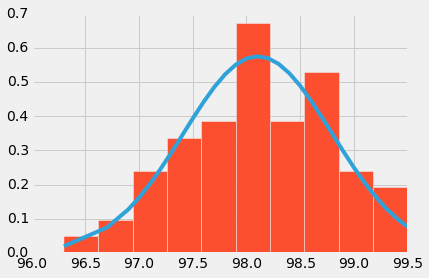

In [193]:
fit = stats.norm.pdf(mtemps, mmean, msigma)
plt.plot(mtemps, fit)
plt.hist(mtemps, 10, normed=True)

### Female Distribution

(array([ 0.1048951 ,  0.06993007,  0.13986014,  0.41958042,  0.52447552,
         0.6993007 ,  0.20979021,  0.03496503,  0.03496503,  0.03496503]),
 array([  96.4 ,   96.84,   97.28,   97.72,   98.16,   98.6 ,   99.04,
          99.48,   99.92,  100.36,  100.8 ]),
 <a list of 10 Patch objects>)

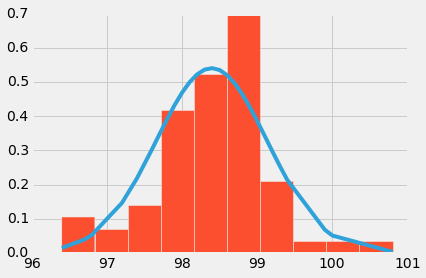

In [194]:
fit = stats.norm.pdf(ftemps, fmean, fsigma)
plt.plot(ftemps, fit)
plt.hist(ftemps, 10, normed=True)

### Hypotheses

Null Hypothesis: There is no difference between the male and female means.

Alternative Hypothesis: There is a difference.

$H_{0}: \mu_{male} - \mu_{female} = 0$

$H_{a}: \mu_{male} - \mu_{female} \neq 0$

In [196]:
diff = mmean - fmean
serror = ((msigma**2)/msize + (fsigma**2)/fsize)**.5
z = abs(diff/serror)
p = (1 - stats.norm.cdf(z)) * 2
print 'Point Estimate: ', diff
print 'Standard Error: ', serror
print "Z-Score: ", z
print "p: ", p

Point Estimate:  -0.289230769231
Standard Error:  0.125576685213
Z-Score:  2.30322028919
p:  0.0212664518303


### Conclusions

Because p is less than .05, the null hypothesis is rejected, and the data is evidence that there is a difference in the body temperature population means for men and women.